In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [83]:
# dataset
sales = pd.read_csv('Diwali_Sales_Data.csv', encoding='unicode_escape')
sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [84]:
# dropunwanted column
sales.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [85]:
sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [86]:
# shape
sales.shape

(11251, 13)

In [87]:
# info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [88]:
# check null value
sales.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [89]:
# drop null vales
sales.dropna(inplace=True)

In [90]:
# shape
sales.shape

(11239, 13)

In [93]:
# duplicates
sales.duplicated().sum()

8

In [94]:
# drop duplicates
sales.drop_duplicates(inplace=True)

In [95]:
# change datatype
sales['Amount'] = sales['Amount'].astype('int')

In [96]:
sales['Amount'].dtype

dtype('int64')

In [97]:
# columns
sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [98]:
# rename column
sales.rename(columns={'Marital_Status': 'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [99]:
# dscribe for specific column ( age,orders,amount)
sales[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084676
std,12.756116,1.114880,5221.728074
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


# EDA ( Exploratory Data Analysis )

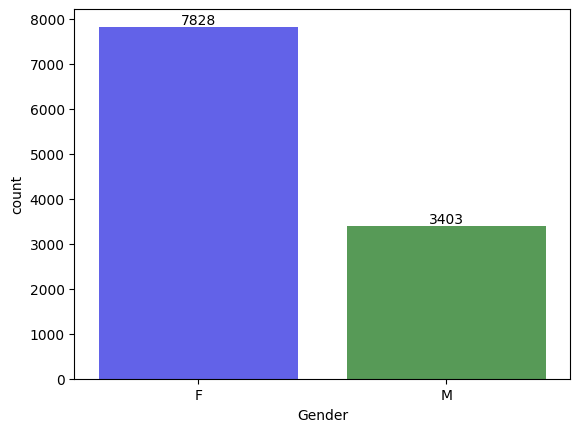

In [102]:
# countplot gender add values on bars
ax=sns.countplot(x=sales['Gender'], palette=['b', 'g'],alpha=0.7)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

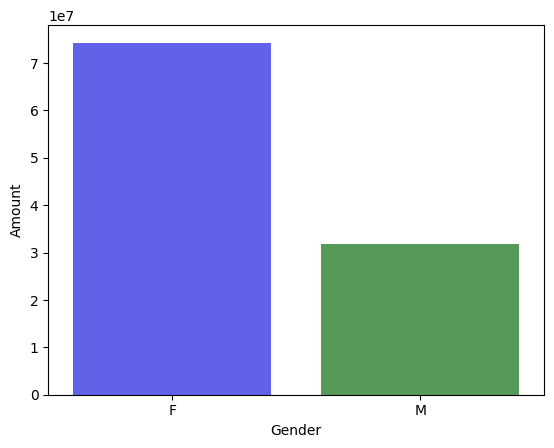

In [106]:
# plotting a bar chart for gender vs total amount
sales_gen=sales.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gen,palette=['blue', 'g'],alpha=0.7)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# Age

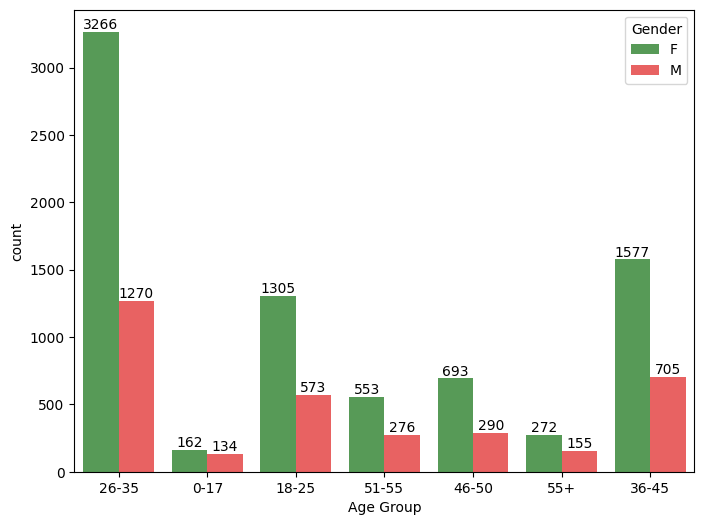

In [107]:
# countplot age group ,hue='gender'
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Age Group', data=sales, hue='Gender',palette=['g','r'],alpha=0.7)
for bars in ax.containers:
    ax.bar_label(bars)


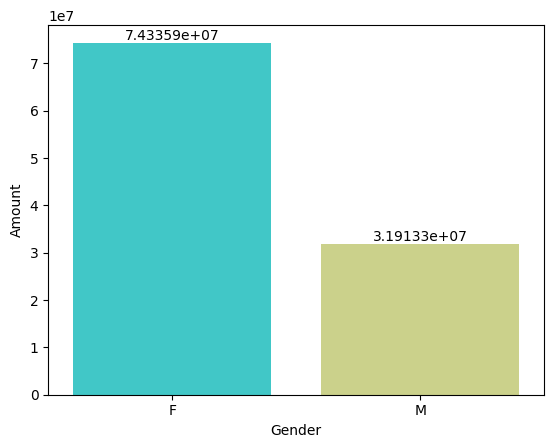

In [39]:
# group by gender , sum by amount
sal_gen=sales.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax=sns.barplot(x='Gender', y='Amount', data=sal_gen,palette='rainbow')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

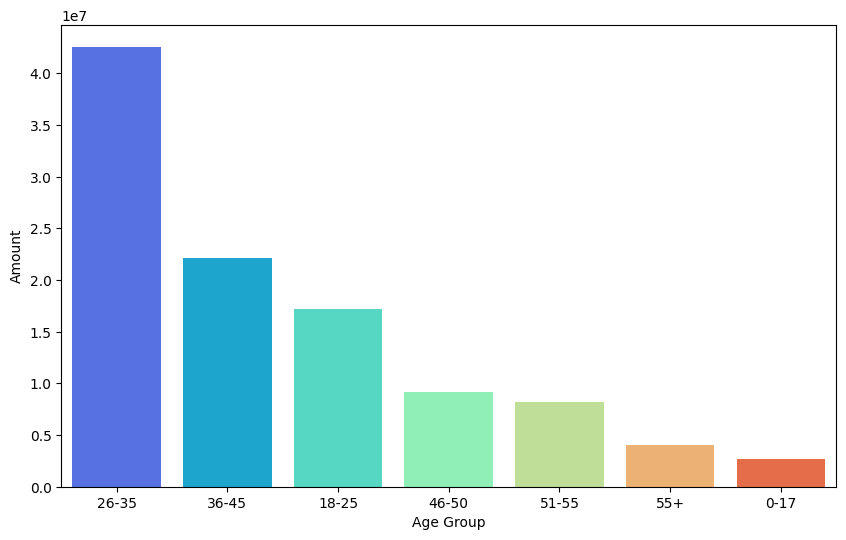

In [108]:
# amount vs age group
plt.figure(figsize=(10,6))
sal_age=sales.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sal_age,palette='rainbow')

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

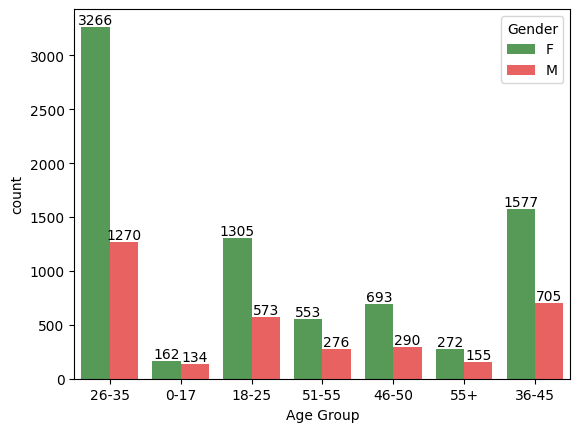

In [109]:
# age group , gender
ax=sns.countplot(x='Age Group', hue='Gender', data=sales, palette=['g','r'],alpha=0.7)
for bars in ax.containers:
    ax.bar_label(bars)

# State

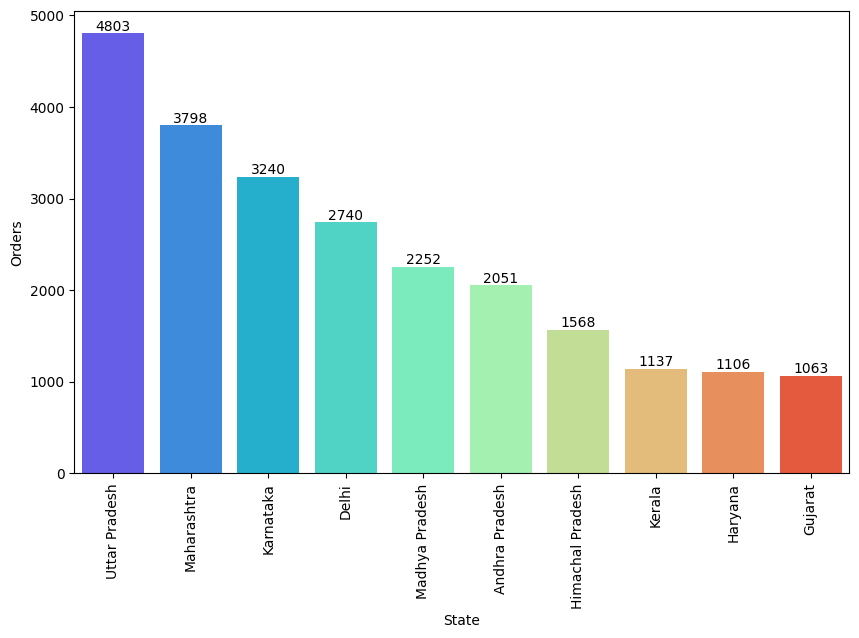

In [110]:
# total no of orders by 10 state
plt.figure(figsize=(10,6))
sal_state=sales.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.xticks(rotation=90)
ax=sns.barplot(x='State', y='Orders', data=sal_state, palette='rainbow')
for bars in ax.containers:
    ax.bar_label(bars)

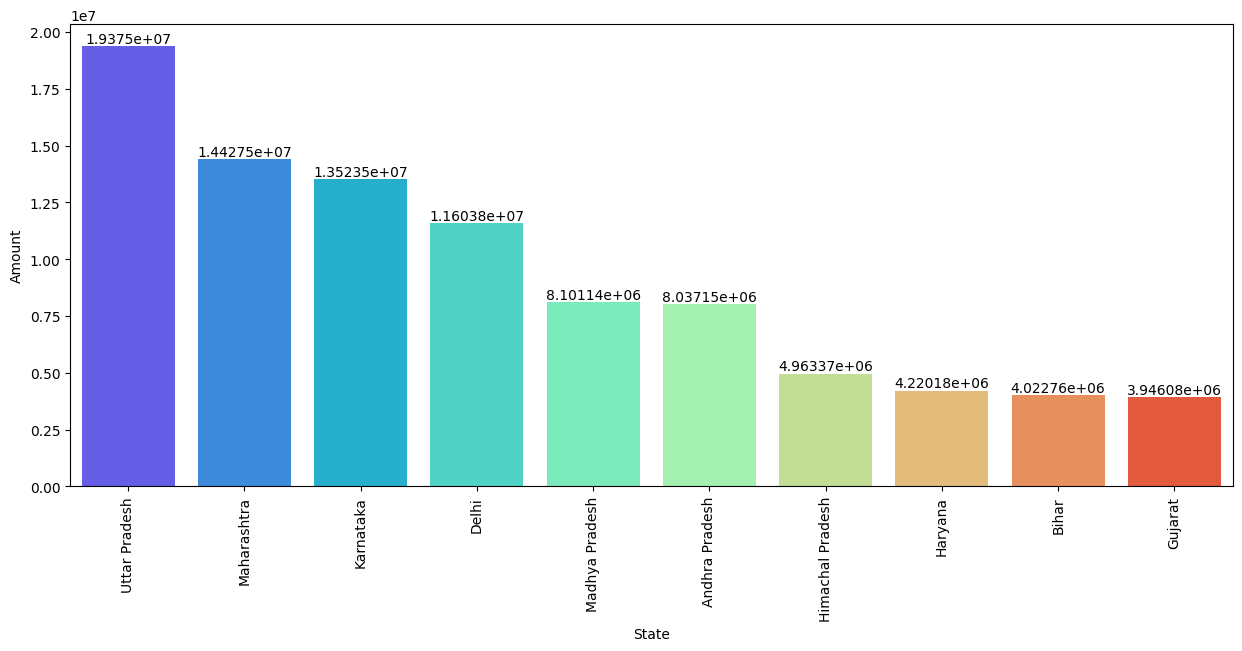

In [60]:
# total amount for top 10 state
plt.figure(figsize=(15,6))
sal_state=sales.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.xticks(rotation=90)
ax=sns.barplot(x='State', y='Amount', data=sal_state, palette='rainbow')
for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


# Marital Status

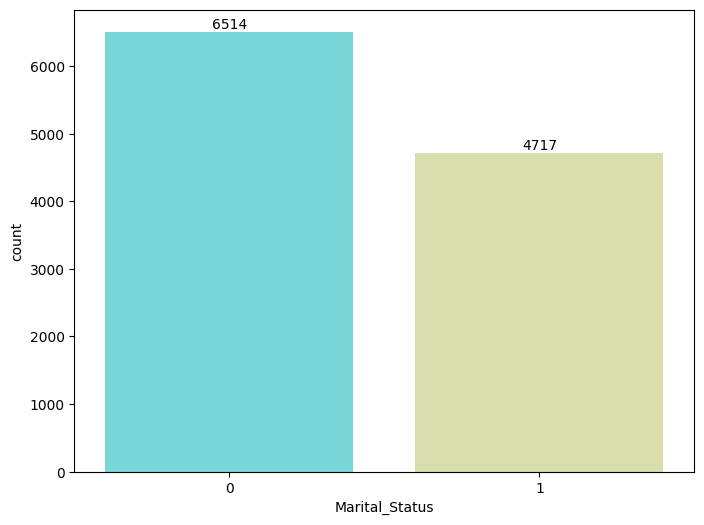

In [111]:
# countplot marital
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Marital_Status', data=sales, palette='rainbow', alpha=0.7)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

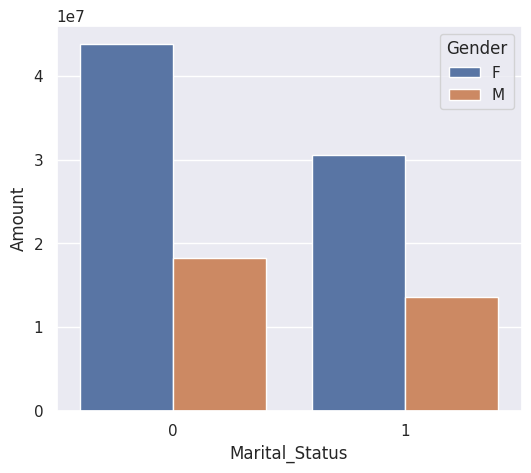

In [112]:
sales_state = sales.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

# occupation

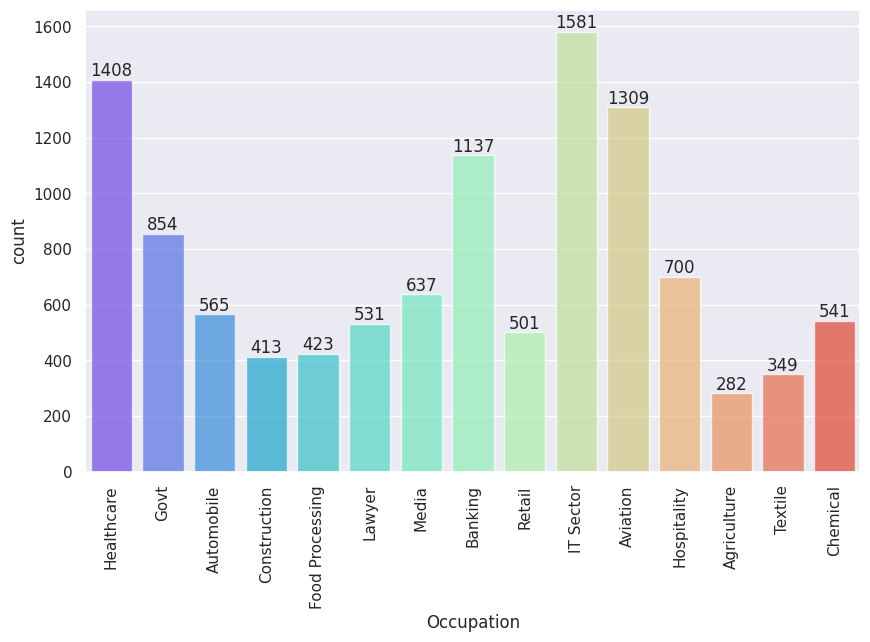

In [113]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax=sns.countplot(x='Occupation', data=sales, palette='rainbow', alpha=0.7)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

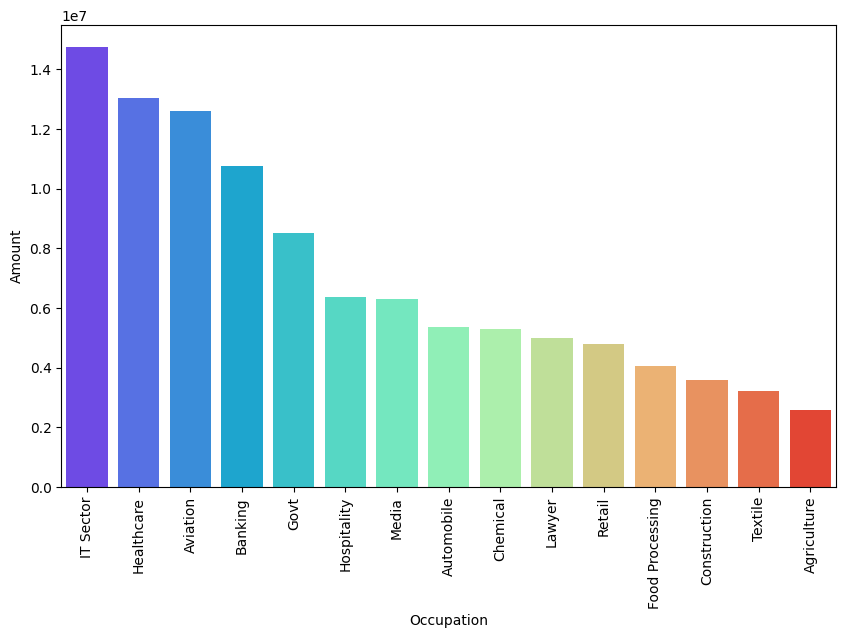

In [69]:
# occupation vs amount
plt.figure(figsize=(10,6))
sal_occ=sales.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='Occupation', y='Amount', data=sal_occ, palette='rainbow')



*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Product category

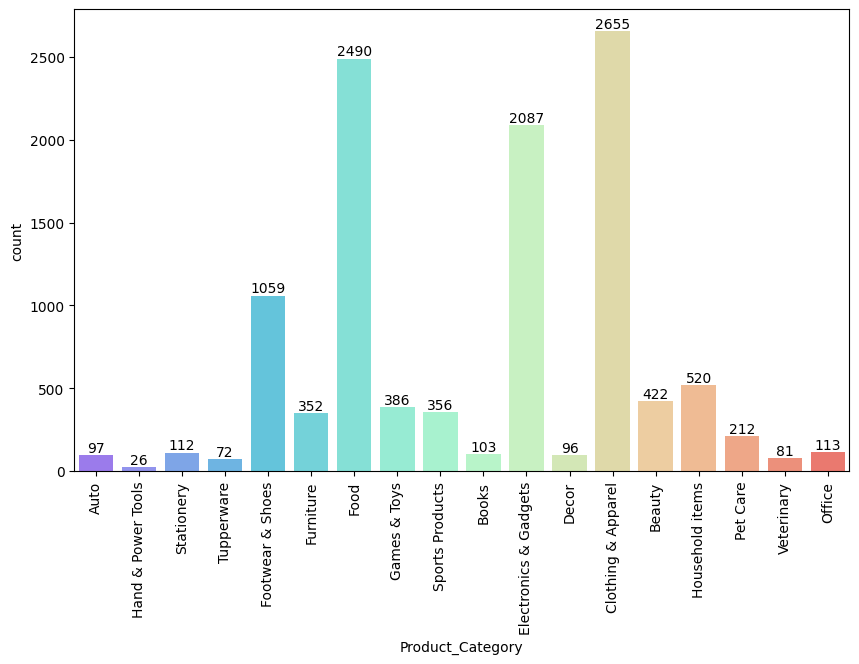

In [67]:
# Product category
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax=sns.countplot(x='Product_Category', data=sales, palette='rainbow', alpha=0.7)
for bars in ax.containers:
    ax.bar_label(bars)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery')])

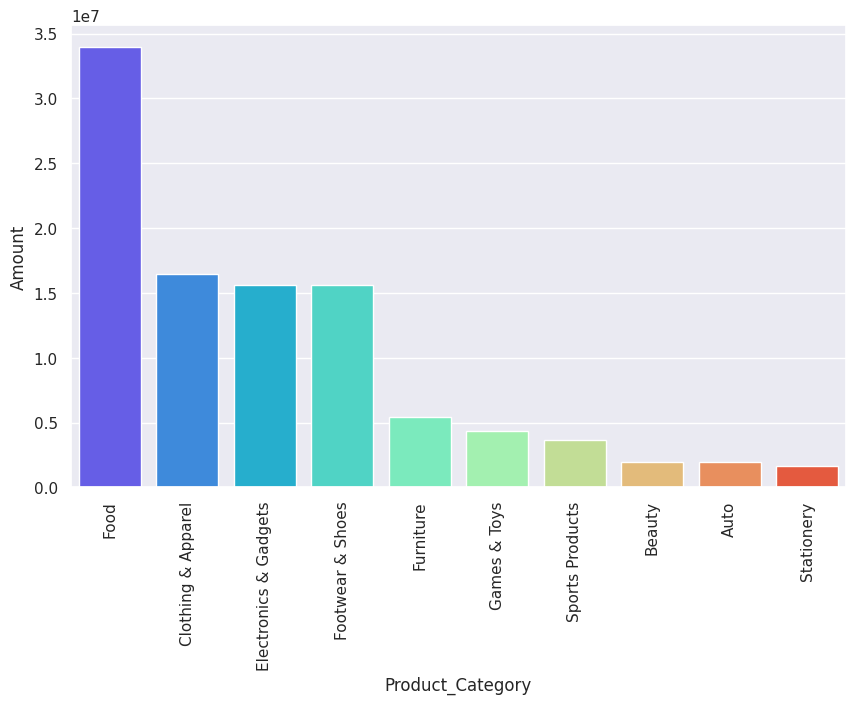

In [117]:
# product category vs amounr
plt.figure(figsize=(10,6))
sal_cat=sales.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='Product_Category', y='Amount', data=sal_cat,palette='rainbow')
plt.xticks(rotation=90)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

In [79]:
sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


<Axes: xlabel='Product_ID', ylabel='Orders'>

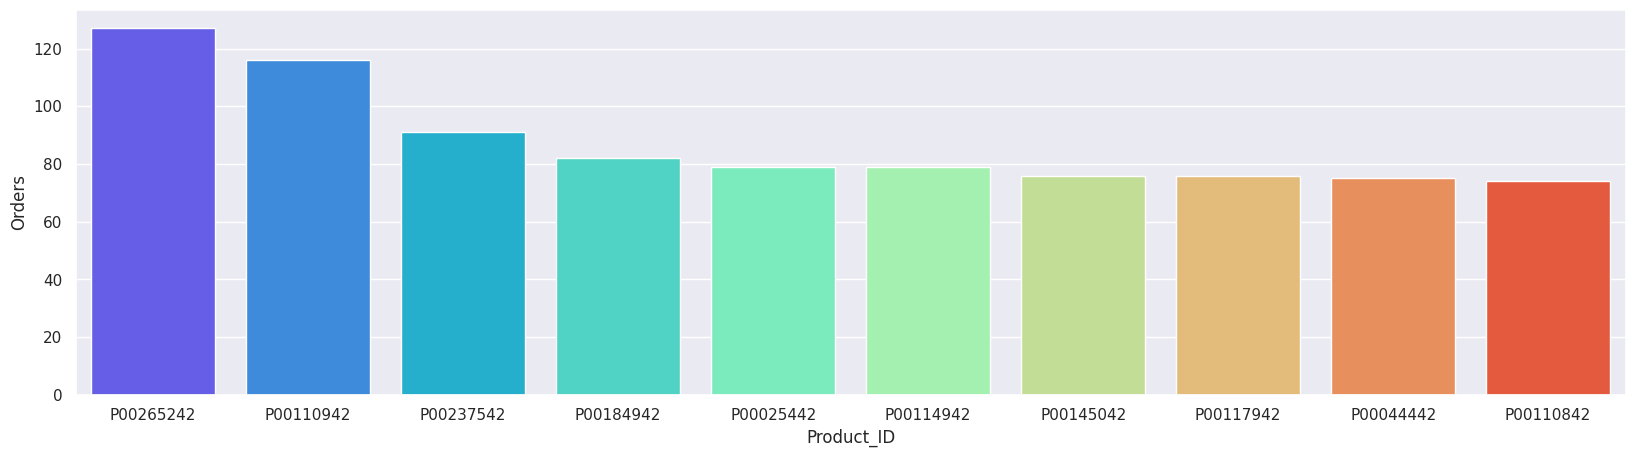

In [118]:
# productid vs orders
sales_state = sales.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='rainbow')

<Axes: xlabel='Product_ID'>

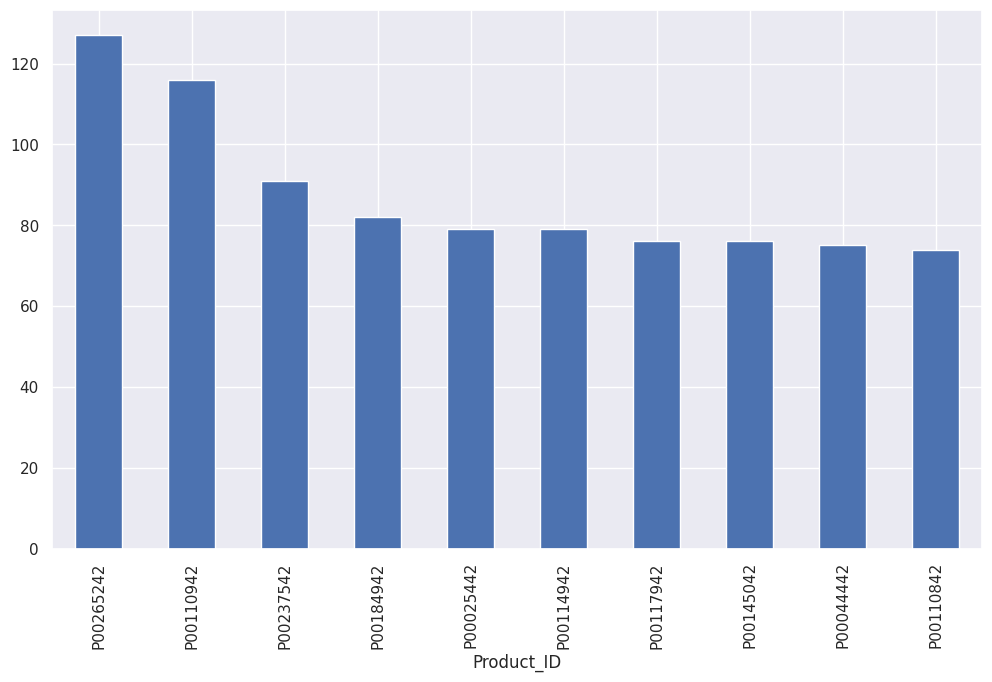

In [122]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
sales.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*